In [34]:
import pandas as pd
import numpy as np


In [35]:
#Loading Excel training data

In [36]:
Train=pd.read_csv("train_E6oV3lV.csv")


In [37]:
data=Train
data.head()
#The head() method returns a specified number of rows, string from the top. The head() method returns the first 5 rows if a number is not specified.

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [38]:
data['label'].value_counts()
# label is a column which tells if the sentiment is negative or positive. We add functions on columns by (.) A column can be accessed by . or ['field']

0    29720
1     2242
Name: label, dtype: int64

C:\Users\Ankit Pal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


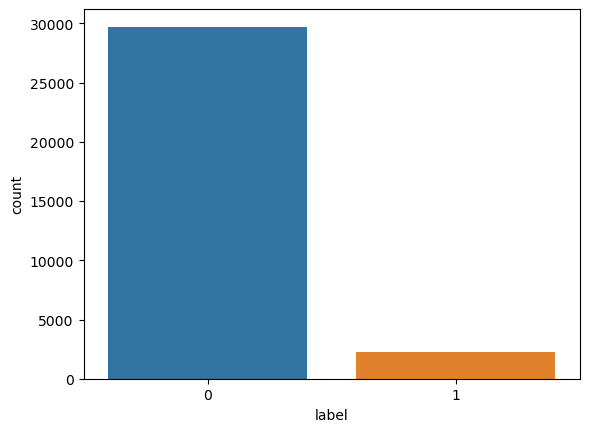

In [39]:
import seaborn as sns
ax=sns.countplot(data.label)

# seaborn used for statistical plotting

In [40]:
# removing usernames from tweet using string replacement

data['new_tweet'] = data.tweet.str.replace('@user', '')
data.head(10)

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [41]:
# removing punctuations, numbers and special characters

# [a-zA-Z] = Any single character in the range a-z or A-Z
# [^a-zA-Z] = Match all strings containing non-letter
# ^[a-zA-Z] = Match all strings that start with a letter

# ^ = Start of line 
# $ = End of line 

data['new_tweet']=data['new_tweet'].str.replace("[^a-zA-Z#]"," ")
data.new_tweet=data.new_tweet.str.replace("#","")
data.head(15)

C:\Users\Ankit Pal\AppData\Local\Temp\ipykernel_3292\2166819777.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['new_tweet']=data['new_tweet'].str.replace("[^a-zA-Z#]"," ")


,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champion...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so gr


In [43]:
# identify most common words in dataset ( Revisit )

from collections import Counter
all_words=[]
for line in list(data['new_tweet']):
    words=line.split()
    for word in words:
        all_words.append(word.lower())
        
a=Counter(all_words).most_common(10)
a
        

[('the', 10238),
 ('to', 9866),
 ('i', 7622),
 ('a', 6540),
 ('you', 5949),
 ('and', 4945),
 ('in', 4704),
 ('for', 4510),
 ('of', 4261),
 ('is', 4196)]

In [44]:
#tokenization ( splitting document sentence into words)

data['new_tweet']=data['new_tweet'].apply(lambda x:x.split())
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [45]:
# stemming

from nltk.stem.snowball import SnowballStemmer
stemmer= SnowballStemmer("english")

data['new_tweet']=data['new_tweet'].apply(lambda x:[stemmer.stem(i) for i in x])
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can, t, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


In [46]:
#nltk is Natural language toolkit, a library for NLP

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Ankit
[nltk_data]     Pal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

In [48]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)

In [49]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
    

In [50]:
data['new_tweet'] = data['new_tweet'].apply(process) 
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[drag, selfish, run, kid, dysfunct, father]"
1,2,0,@user @user thanks for #lyft credit i can't us...,"[van, disapoint, getthank, lyft, caus, wheelch..."
2,3,0,bihday your majesty,"[bihday, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[take, love, model, time]"
4,5,0,factsguide: society now #motivation,"[societi, factsguid, motiv]"


In [51]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install wordcloud 

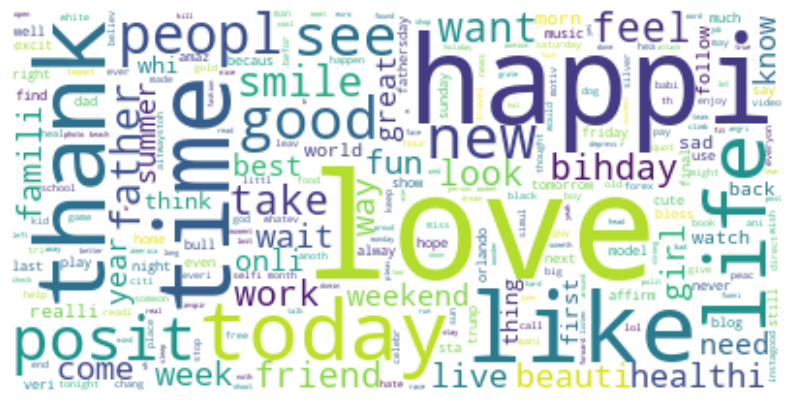

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# split sentences to get individual words
words = []
for line in data['new_tweet']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud( background_color='white', max_words=2000, stopwords=stopwords).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
data['new_tweet'] = data['new_tweet'].apply(string)
data.head()


,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,drag selfish run kid dysfunct father
1,2,0,@user @user thanks for #lyft credit i can't us...,van disapoint getthank lyft caus wheelchair pd...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,take love model time
4,5,0,factsguide: society now #motivation,societi factsguid motiv


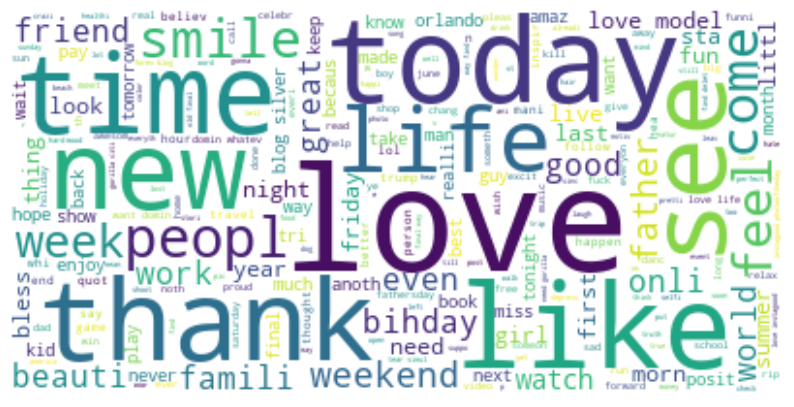

In [55]:
positive = [r for r in data['new_tweet'][data['label']==0]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

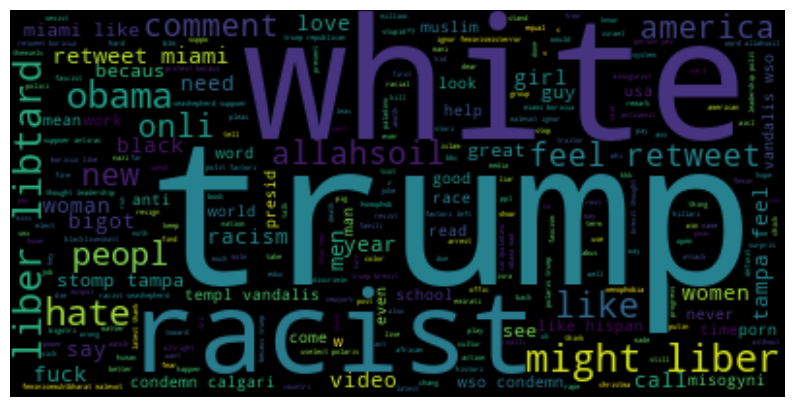

In [56]:
negative = [r for r in data['new_tweet'][data['label']==1]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
# remove column of original tweets

data.drop(["id","tweet" ],axis=1,inplace=True)
data.head()

,label,new_tweet
0,0,drag selfish run kid dysfunct father
1,0,van disapoint getthank lyft caus wheelchair pd...
2,0,bihday majesti
3,0,take love model time
4,0,societi factsguid motiv


In [58]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["new_tweet"], 
                                                    data["label"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (25569,) (25569,)
testing set : (6393,) (6393,)


In [59]:
#TF-IDF 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [60]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)


(25569, 27304)
(25569, 27304)


In [ ]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

In [ ]:
#Model buildiing

#random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

In [71]:
predictions = model.predict(x_test_tfidf)

In [72]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100


96.19896762083529

In [73]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[5896,   41],
       [ 202,  254]], dtype=int64)

In [74]:
#f1-score
f1_score(y_test,predictions)

0.6764314247669773

In [69]:
predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)